In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

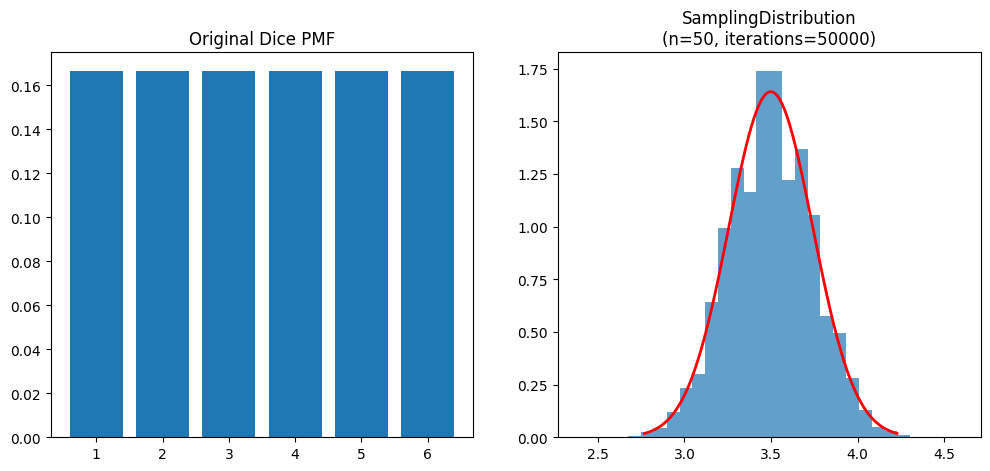

In [2]:
def demonstrate_clt(dice_pmf, sampel_size, num_iterations):
  faces,probs = zip(*sorted(dice_pmf.items()))
  sampel_means = [np.random.choice(faces,size=sampel_size,p=probs).mean()
                  for _ in range(num_iterations)]
  fig,(ax1,ax2) = plt.subplots(1, 2,figsize=(12,5))
  ax1.bar(faces, probs)
  ax1.set_title("Original Dice PMF")
  ax2.hist(sampel_means, bins=30, density=True, alpha=0.7)
  ax2.set_title(f"SamplingDistribution\n(n={sampel_size}, iterations={num_iterations})")

  mu,std = np.mean(sampel_means), np.std(sampel_means)
  x = np.linspace(mu - 3*std, mu + 3*std, 100)
  ax2.plot(x, stats.norm.pdf(x, mu, std), 'r-', linewidth=2)
  plt.show()

dice_pmf = {1:1/6,
            2:1/6,
            3:1/6,
            4:1/6,
            5:1/6,
            6:1/6,}
demonstrate_clt(dice_pmf, sampel_size=50, num_iterations=50000)